**Задание:**

Провести анализ, найти закономерности и сделать вывод
Каждая строчка наборов данных содержит следующие поля:

1.   Survived — выжил данный пассажир или нет (0 для умерших, 1 для выживших)
2.   Pclass — класс пассажира (1 — высший, 2 — средний, 3 — низший)
3.   Name — имя
4.   Sex — пол
5.   Age — возраст
6.   SibSp — количество братьев, сестер, сводных братьев, сводных сестер, супругов на борту титаника
7.   Parch — количество родителей, детей (в том числе приемных) на борту титаника
8.   Ticket — номер билета
9.   Fare — плата за проезд
10.   Cabin — каюта
11.   Embarked — порт посадки (C — Шербур; Q — Квинстаун; S — Саутгемптон)


**Решение:**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [98]:
df = pd.read_csv('train (2).csv')
print(df.columns.values)
df.head(5)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Анализ общих данных**: 
У нас 891 пассажир, у некоторых нет информации о возрасте, потеряны данные о каютах 

Процент детей (до 18 лет), пустые значения отбросить:

In [48]:
filled_ages = df.dropna(subset = {'Age'})
filled_ages['Age'] = filled_ages['Age'].astype (int)
children = filled_ages.query('Age < 18').sort_values('Age')
print(f'Количество детей {children.shape[0]}')
print(f'Количество людей с известным возрастом {filled_ages.shape[0]}')
children_prc = children.shape[0] / filled_ages.shape[0] * 100
print(f'Процент детей {round(children_prc,2)}%')

Количество детей 113
Количество людей с известным возрастом 714
Процент детей 15.83 %


<ipython-input-48-7790487180ef>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filled_ages['Age'] = filled_ages['Age'].astype (int)


Разбиение пассажиров по возрастам

In [54]:
ages = filled_ages.groupby('Age', as_index=False)\
         .agg({'PassengerId': 'count'})\
         .sort_values('Age')\
         .rename(columns={'PassengerId': 'count'})
ages.head(100)         


,Age,count
0,0,7
1,1,7
2,2,10
3,3,6
4,4,10
...,...,...
66,66,1
67,70,3
68,71,2
69,74,1


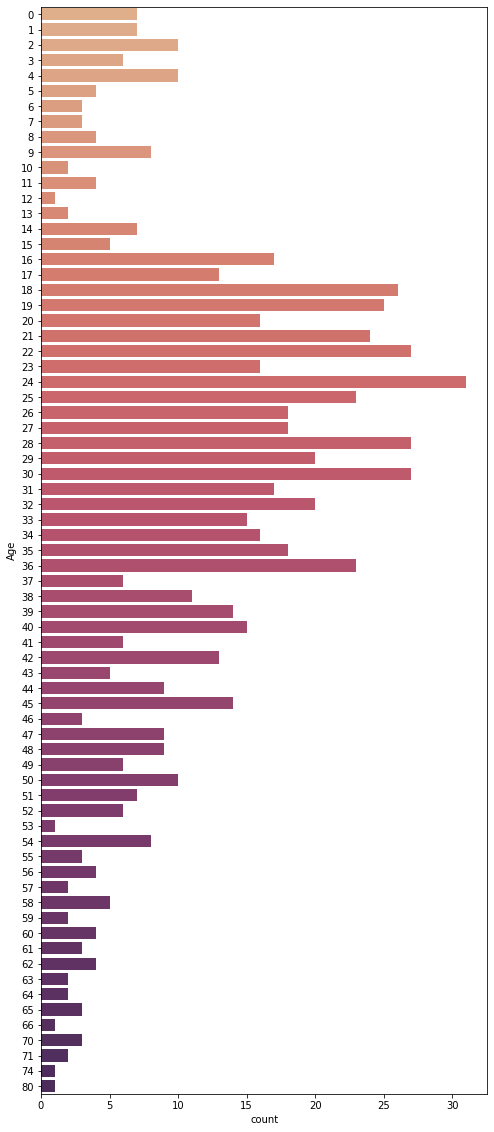

In [58]:
plt.figure(figsize=(8,20))
sns.barplot(data=ages, y='Age', x='count', palette='flare', orient = 'h')
plt.show()

Группировка возрастов пассажиров по 10 лет.
Большинство пассажиров от 20 до 40 лет

(array([ 62., 102., 220., 167.,  89.,  48.,  19.,   7.]),
 array([ 0, 10, 20, 30, 40, 50, 60, 70, 80]),
 <a list of 8 Patch objects>)

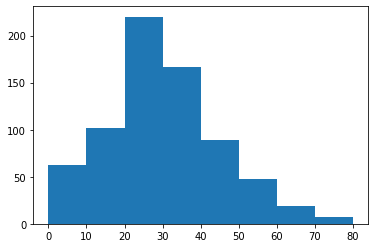

In [63]:
bins_years = range(0,81,10)
plt.hist(filled_ages['Age'], bins=bins_years)

Количество мужчин и женщин в процентах.
Больше мужчин

In [100]:
sex = df.Sex.value_counts(normalize=True)\
             .mul(100).round(2).reset_index()\
             .rename(columns={'PassengerId': 'count'})
sex

,index,Sex
0,male,64.76
1,female,35.24


Выживаемость от пола. Намного больше женщин выжило

In [76]:
survivability_sex = df.groupby('Sex', as_index=False)['Survived'].mean()
survivability_sex

,Sex,Survived
0,female,0.742038
1,male,0.188908


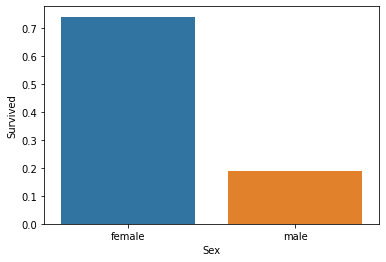

In [77]:
sns.barplot(data=survivability_sex, x='Sex', y='Survived')

Выживаемость от класса пассажира. Чем выше класс пассажира, тем выше выживаемость

In [96]:
survivability_class = df.groupby('Pclass')['Survived']\
                        .agg(['mean','count'])
survivability_class

,mean,count
Pclass,,
1,0.629630,216
2,0.472826,184
3,0.242363,491


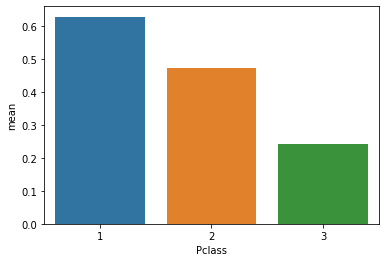

In [97]:
new_survivability_class = survivability_class.reset_index()
sns.barplot(data=new_survivability_class, x='Pclass', y='mean')